## Correlation/autocorrelation

In [167]:
import numpy as np
import matplotlib.pyplot as plt

In [168]:
x = np.linspace(-3, 3, 600)

In [33]:
signal = np.zeros((600), dtype='float64')

In [34]:
signal[250:350] = 1.

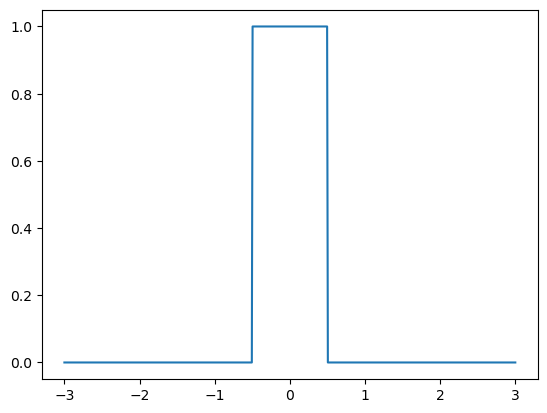

In [35]:
plt.plot(x, signal)

In [10]:
corr = np.correlate(signal, signal, 'same')

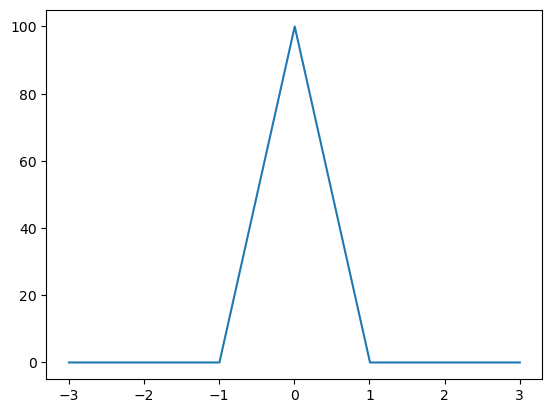

In [36]:
plt.plot(x, corr)

In [23]:
signal2 = np.zeros(600)

In [24]:
for i in range(3):
    signal2[75 + 200*i:125 + 200*i] = 1.

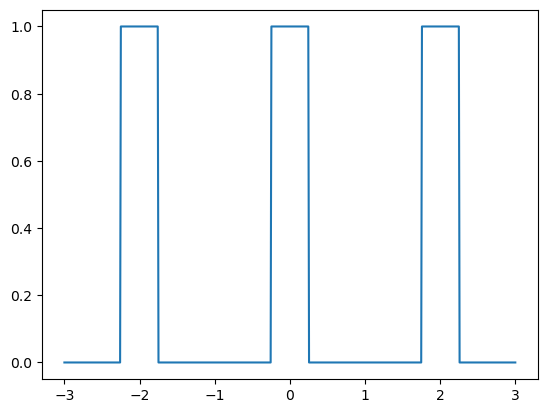

In [37]:
plt.plot(x, signal2)

In [176]:
offset2 = np.roll(signal2, 25)

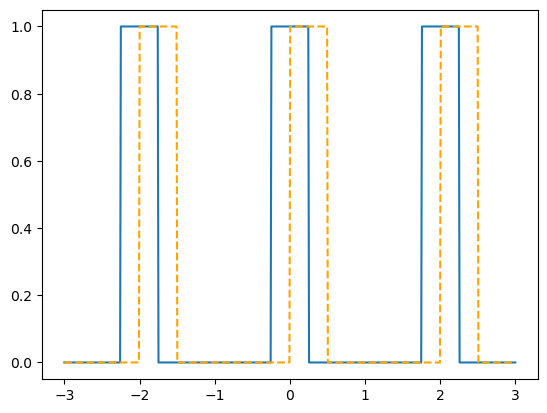

In [177]:
F, ax = plt.subplots(1, 1)
ax.plot(x, signal2)
ax.plot(x, offset2, color='orange', linestyle='dashed')

In [26]:
corr2 = np.correlate(signal2, signal2, 'same')

In [178]:
corr2[324]

78.0

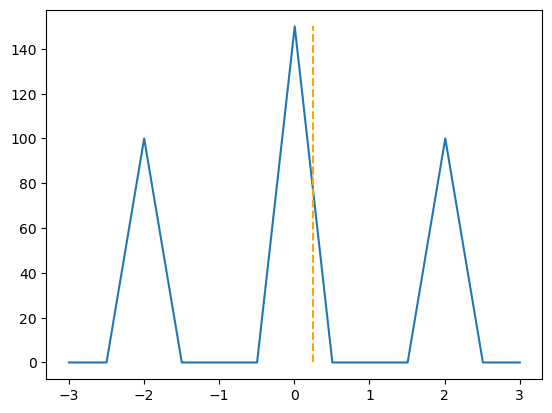

In [183]:
plt.plot(x, corr2)
plt.plot([0.25, 0.25], [0, corr2.max()], color='orange', linestyle='dashed')

## Wavelets

In [39]:
x = np.linspace(-1, 1, 800)

In [40]:
edge = np.zeros(800)
edge[0:400] = 1.
edge[400:] = -1.

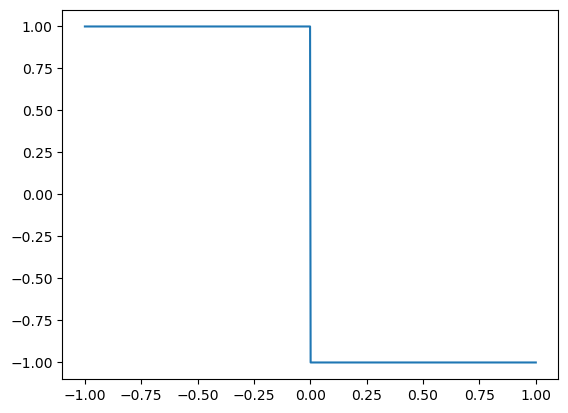

In [41]:
plt.plot(x, edge)

In [133]:
ridge = np.zeros(800)
ridge[:300] = -1
ridge[300:500] = 1.
ridge[500:] = -1

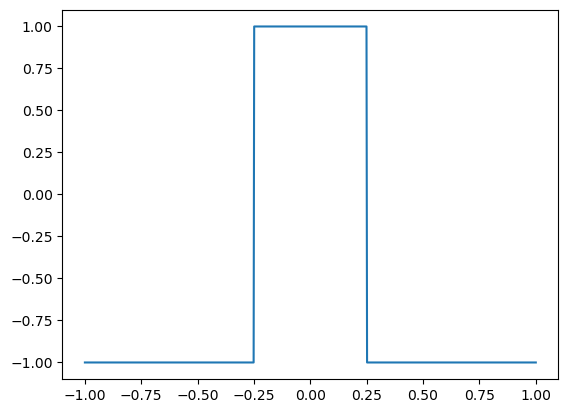

In [134]:
plt.plot(x, ridge)

In [135]:
def d_1_gauss(x, c=0.2):
    return -(x/c)*np.exp(-x**2/(2*(c**2))) / np.sqrt(c)

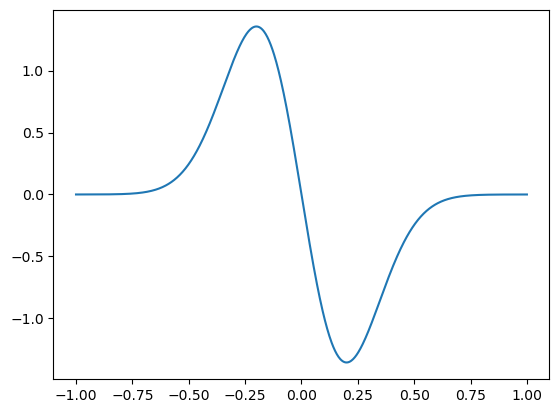

In [136]:
plt.plot(x, d_1_gauss(x, 0.2))

In [124]:
def d_2_gauss(x, c):
    return 1/np.sqrt(c) * (1 - c**(-2) * x**2) * np.exp(-x**2 / (2 * c**2))

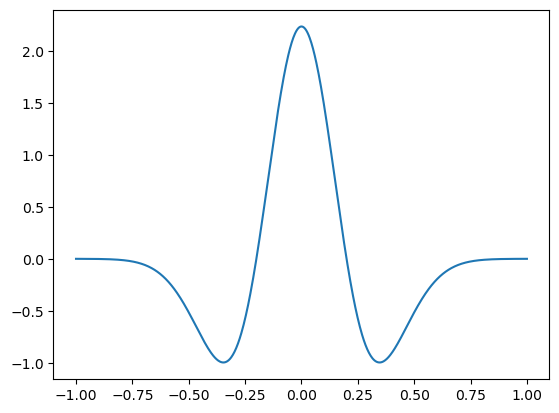

In [125]:
plt.plot(x, d_2_gauss(x, 0.2))

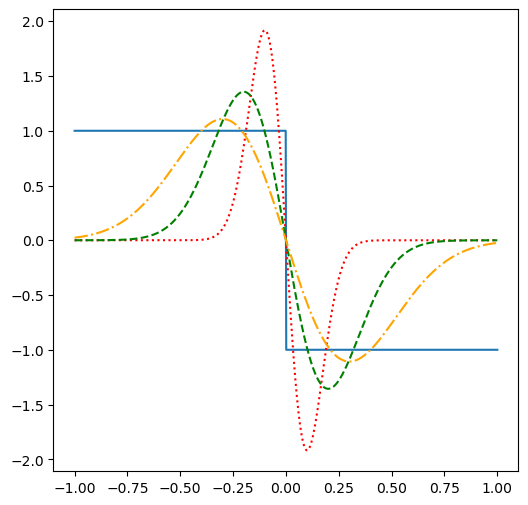

In [137]:
F, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(x, edge)
ax.plot(x, d_1_gauss(x, 0.1), color='red', linestyle='dotted')
ax.plot(x, d_1_gauss(x, 0.2), color='green', linestyle='dashed')
ax.plot(x, d_1_gauss(x, 0.3), color='orange', linestyle='dashdot')

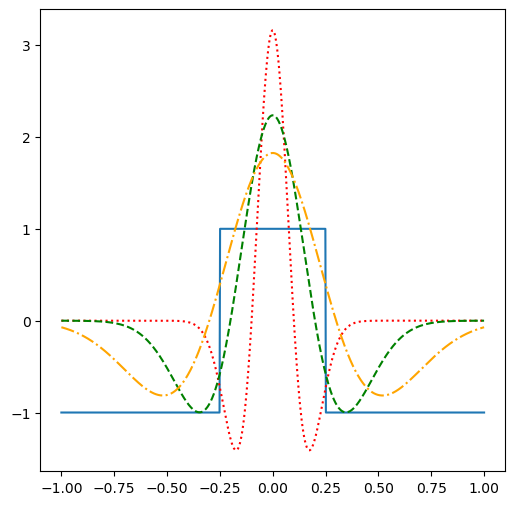

In [138]:
F, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(x, ridge)
ax.plot(x, d_2_gauss(x, 0.1), color='red', linestyle='dotted')
ax.plot(x, d_2_gauss(x, 0.2), color='green', linestyle='dashed')
ax.plot(x, d_2_gauss(x, 0.3), color='orange', linestyle='dashdot')

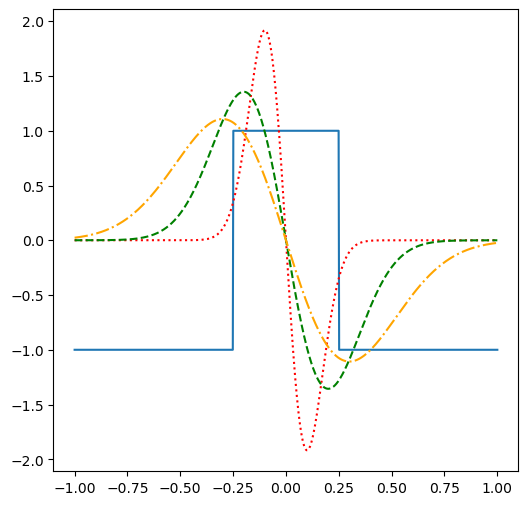

In [139]:
F, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(x, ridge)
ax.plot(x, d_1_gauss(x, 0.1), color='red', linestyle='dotted')
ax.plot(x, d_1_gauss(x, 0.2), color='green', linestyle='dashed')
ax.plot(x, d_1_gauss(x, 0.3), color='orange', linestyle='dashdot')

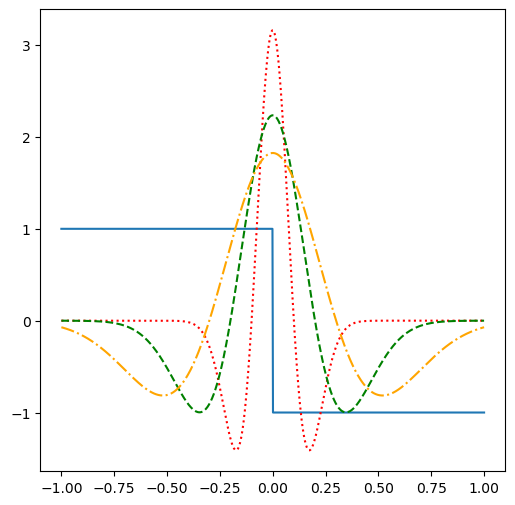

In [140]:
F, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(x, edge)
ax.plot(x, d_2_gauss(x, 0.1), color='red', linestyle='dotted')
ax.plot(x, d_2_gauss(x, 0.2), color='green', linestyle='dashed')
ax.plot(x, d_2_gauss(x, 0.3), color='orange', linestyle='dashdot')

## FRT

In [7]:
import numpy as np
from frat import frt
import matplotlib.pyplot as plt

In [2]:
fig_frt = frt()

In [143]:
blank_img = np.zeros((13, 13))

In [144]:
fig_frt.fit(blank_img)

[]

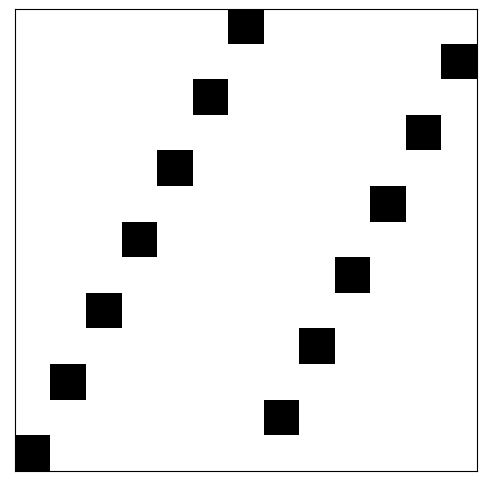

In [161]:
F, ax = plt.subplots(1, 1, figsize=(6, 6))

n_vec = fig_frt.n_vecs[2]

lines_ex = np.empty((13, 13))
# first_col = np.arange(149)[::-1]
first_col = np.zeros(13)
first_col[-1] = 1
if n_vec[1] != 0:
    lines_ex[:, 0] = first_col
    x_step = n_vec[1]
    y_step = -n_vec[0]
    for i in range(1, 13):
        lines_ex[:, int(i * x_step) % 13] = np.roll(first_col, -int(i * y_step) % 13)
        
ax.imshow(lines_ex, alpha=lines_ex, cmap='gray_r')
ax.set_xticks([])
ax.set_yticks([])

In [3]:
fig_frt_2 = frt()

In [4]:
blank_img = np.zeros((149, 149))

In [5]:
fig_frt_2.fit(blank_img)

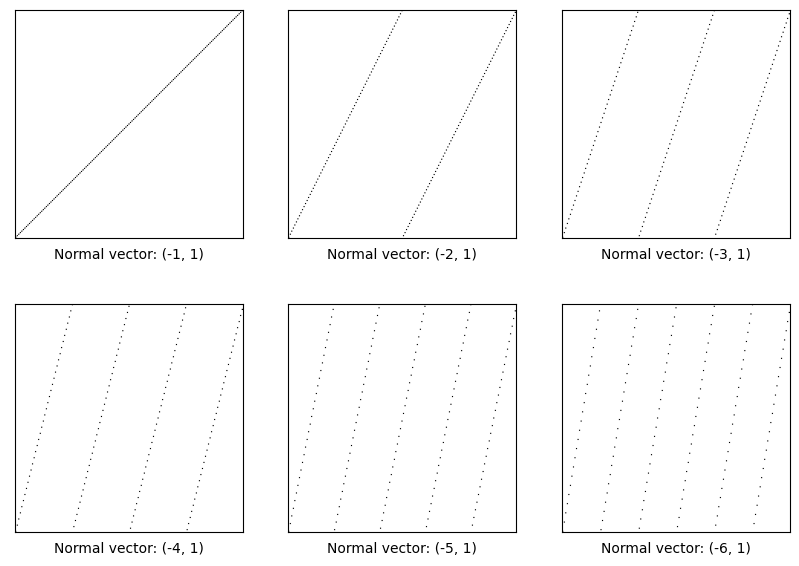

In [85]:
F, axs = plt.subplots(2, 3, figsize=(10, 7))

for i, ax in enumerate(np.ravel(axs)):
    n_vec = fig_frt_2.n_vecs[i+1]

    lines_ex = np.empty((149, 149))
    # first_col = np.arange(149)[::-1] / 149
    first_col = np.zeros(149)
    first_col[-1] = 1
    if n_vec[1] != 0:
        lines_ex[:, 0] = first_col
        x_step = n_vec[1]
        y_step = -n_vec[0]
        for i in range(1, 149):
            lines_ex[:, int(i * x_step) % 149] = np.roll(first_col, -int(i * y_step) % 149)

    ax.imshow(lines_ex, alpha=lines_ex, cmap='gray_r')
    ax.set_xlabel(f'Normal vector: ({n_vec[0]:1.0f}, {n_vec[1]:1.0f})')
    ax.set_xticks([])
    ax.set_yticks([])

In [81]:
fig_frt_2.n_vecs[1]

[-1.0, 1.0]